In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Ex1 **

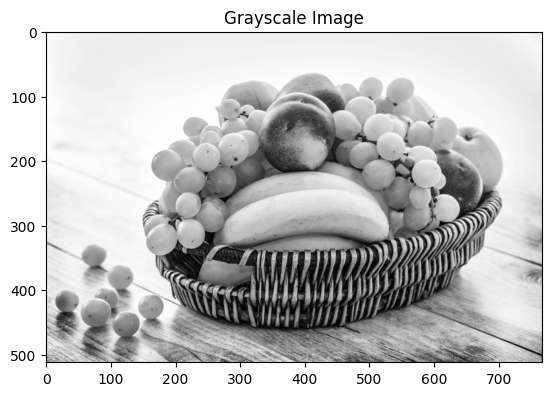

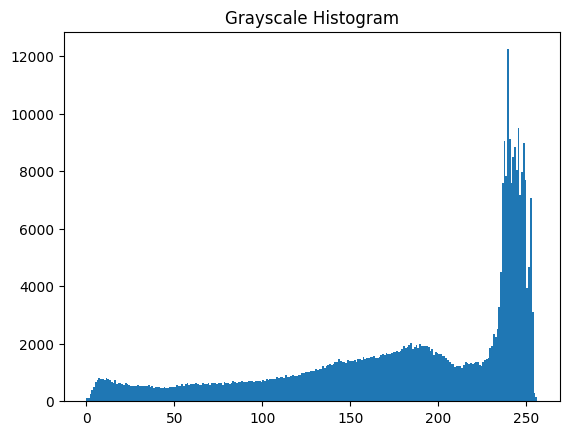

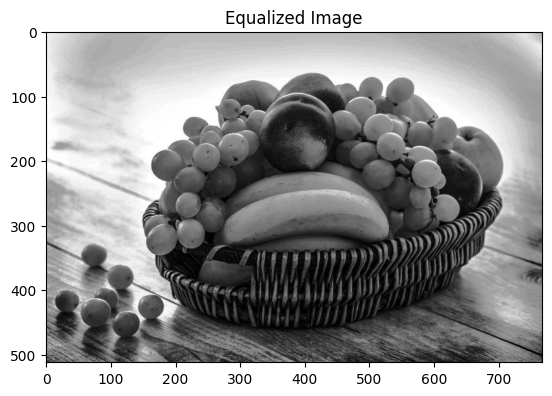

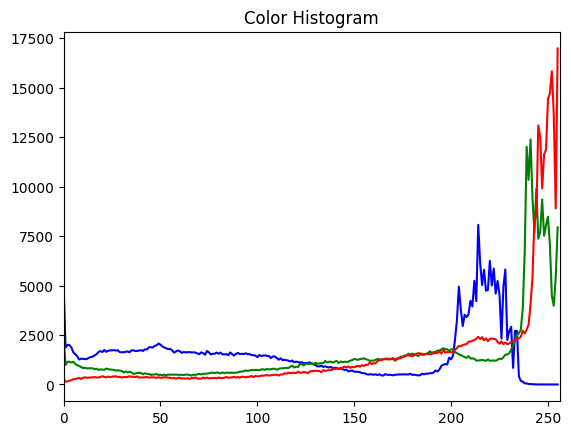

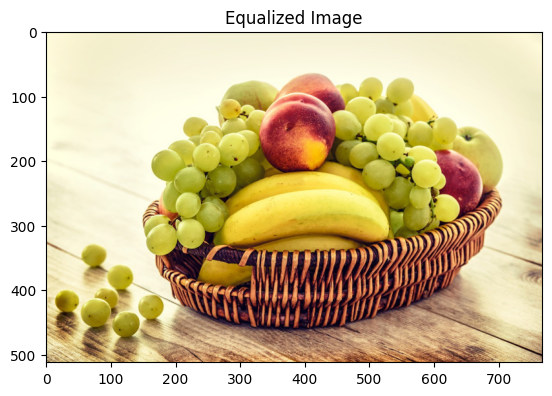

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/drive/MyDrive/TP2 VISION/fruits.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

plt.hist(image.ravel(), 256, [0, 256])
plt.title('Grayscale Histogram')
plt.show()

equalized_image = cv2.equalizeHist(image)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()

image_rgb = cv2.imread('/content/drive/MyDrive/TP2 VISION/fruits.jpg', cv2.IMREAD_COLOR)
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    hist = cv2.calcHist([image_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.title('Color Histogram')
plt.show()

equalized_image = cv2.equalizeHist(image)
plt.imshow(cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB))
plt.title('Equalized Image')
plt.show()



# **Ex2**

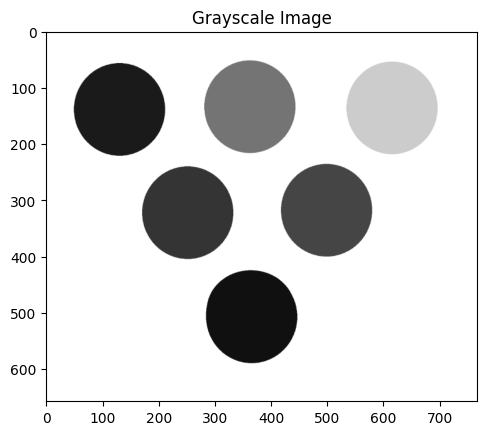

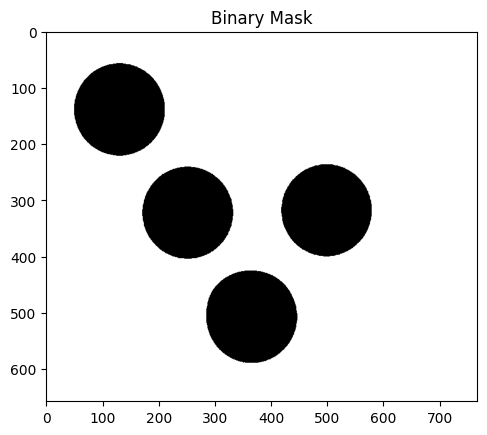

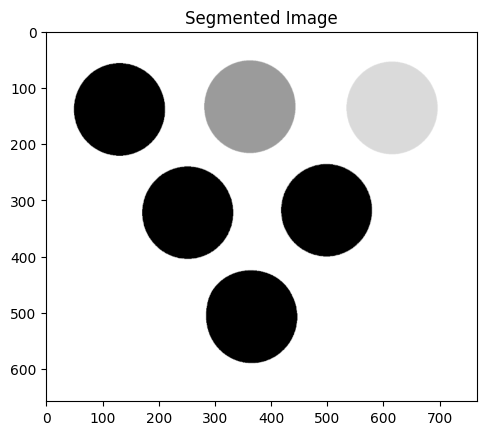

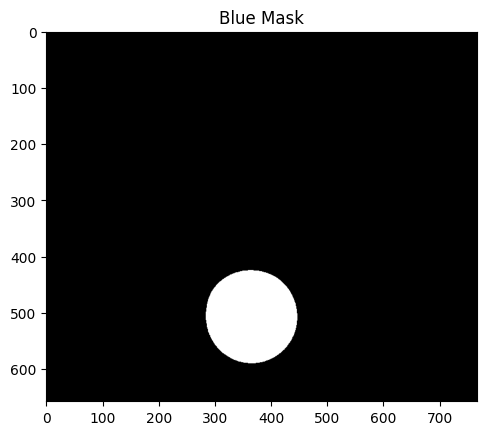

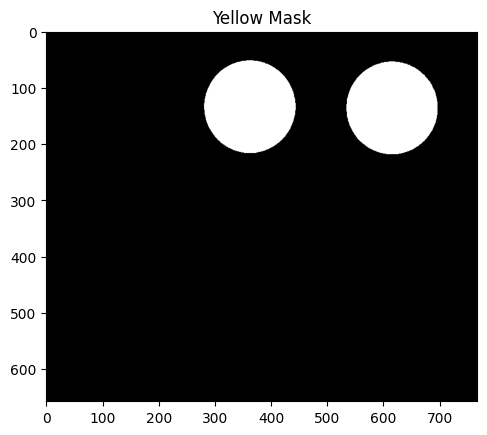

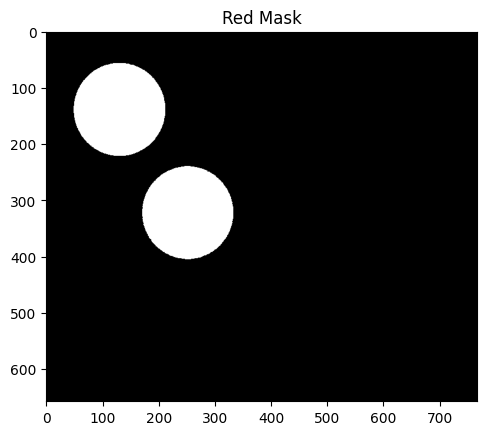

In [17]:
image = cv2.imread('/content/drive/MyDrive/TP2 VISION/circles.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.title('Grayscale Image')
plt.show()

ret, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(mask, cmap='gray')
plt.title('Binary Mask')
plt.show()

segmented = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image')
plt.show()

image_hsv = cv2.cvtColor(cv2.imread('/content/drive/MyDrive/TP2 VISION/circles.png'), cv2.COLOR_BGR2HSV)
blue_mask = cv2.inRange(image_hsv, np.array([100, 60, 60]), np.array([140, 255, 255]))
yellow_mask = cv2.inRange(image_hsv, np.array([5, 100, 100]), np.array([40, 255, 255]))
red_mask = cv2.inRange(image_hsv, np.array([150, 30, 30]), np.array([190, 255, 255]))

plt.imshow(blue_mask, cmap='gray')
plt.title('Blue Mask')
plt.show()

plt.imshow(yellow_mask, cmap='gray')
plt.title('Yellow Mask')
plt.show()

plt.imshow(red_mask, cmap='gray')
plt.title('Red Mask')
plt.show()


# **EX3**

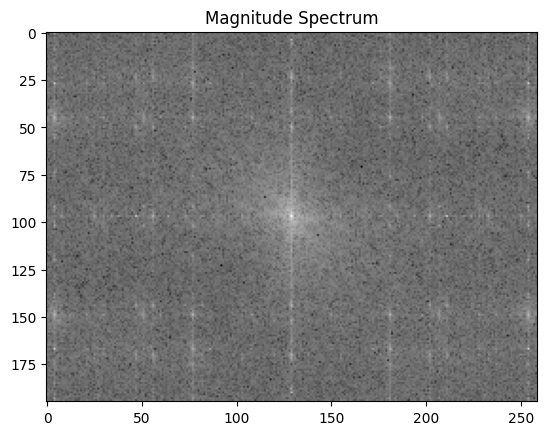

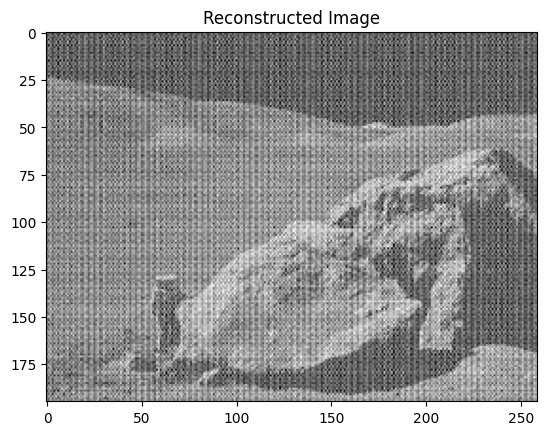

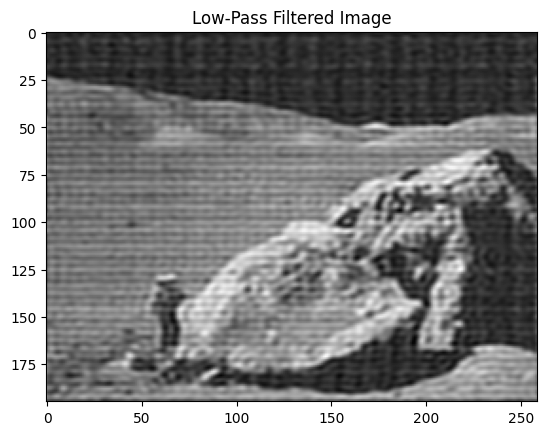

In [18]:
image = cv2.imread('/content/drive/MyDrive/TP2 VISION/images.jpg', cv2.IMREAD_GRAYSCALE)
f_transform = np.fft.fft2(image)
f_transform_shift = np.fft.fftshift(f_transform)

magnitude_spectrum = np.log(1 + np.abs(f_transform_shift))
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

f_transform_shift_back = np.fft.ifftshift(f_transform_shift)
image_back = np.fft.ifft2(f_transform_shift_back)
image_back = np.abs(image_back)
plt.imshow(image_back, cmap='gray')
plt.title('Reconstructed Image')
plt.show()

def idealFilterLP(D0, imgShape):
    base = np.zeros(imgShape)
    center = (imgShape[0]//2, imgShape[1]//2)
    for i in range(imgShape[0]):
        for j in range(imgShape[1]):
            if np.sqrt((i - center[0])**2 + (j - center[1])**2) < D0:
                base[i, j] = 1
    return base

low_pass_filter = idealFilterLP(50, image.shape)
filtered_image = f_transform_shift * low_pass_filter
filtered_image_back = np.fft.ifftshift(filtered_image)
image_back_filtered = np.abs(np.fft.ifft2(filtered_image_back))

plt.imshow(image_back_filtered, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.show()

# **EX4**

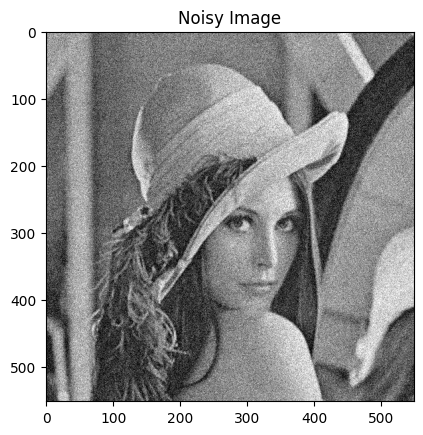

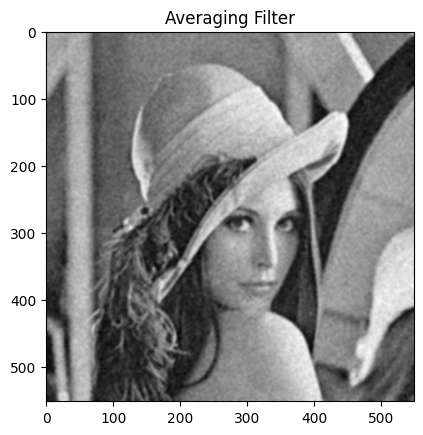

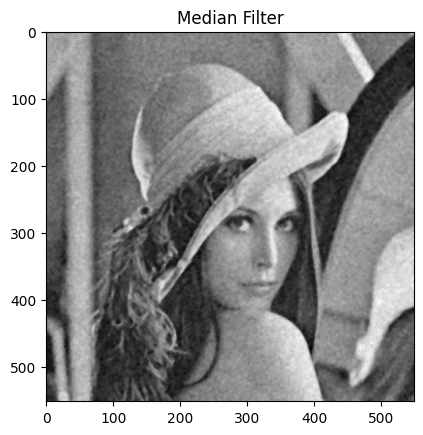

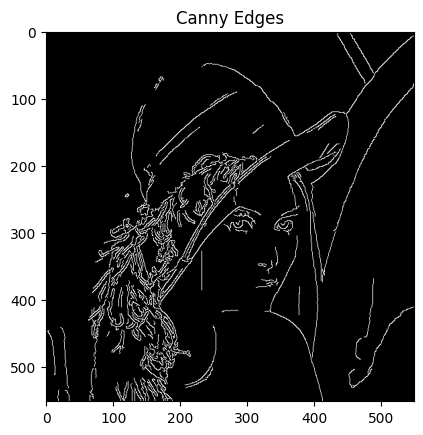

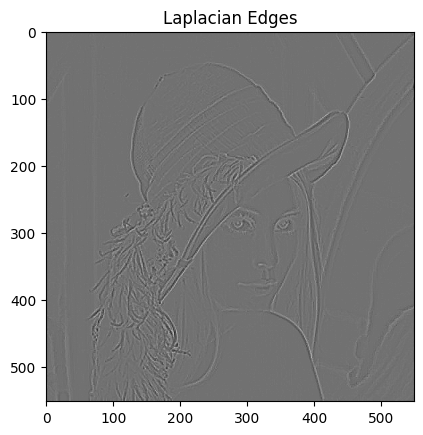

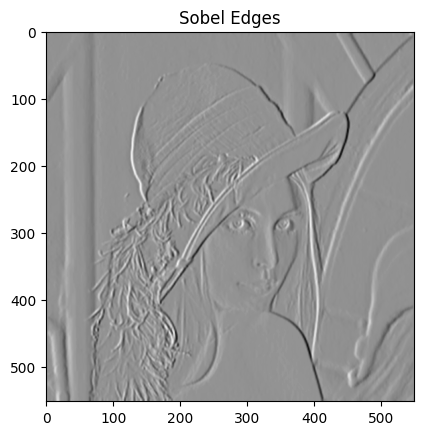

In [19]:
from skimage.util import random_noise
from skimage.restoration import denoise_bilateral
import cv2

image = cv2.imread('/content/drive/MyDrive/TP2 VISION/Lenna.jpg', cv2.IMREAD_GRAYSCALE)
noisy_image = random_noise(image, mode='gaussian')
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.show()

blurred_image = cv2.blur(noisy_image, (5, 5))
plt.imshow(blurred_image, cmap='gray')
plt.title('Averaging Filter')
plt.show()

median_image = cv2.medianBlur((noisy_image*255).astype(np.uint8), 5)
plt.imshow(median_image, cmap='gray')
plt.title('Median Filter')
plt.show()


edges_canny = cv2.Canny(image, 100, 200)
edges_laplacian = cv2.Laplacian(image, cv2.CV_64F)
edges_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.imshow(edges_canny, cmap='gray')
plt.title('Canny Edges')
plt.show()

plt.imshow(edges_laplacian, cmap='gray')
plt.title('Laplacian Edges')
plt.show()

plt.imshow(edges_sobel, cmap='gray')
plt.title('Sobel Edges')
plt.show()

# **Ex5**

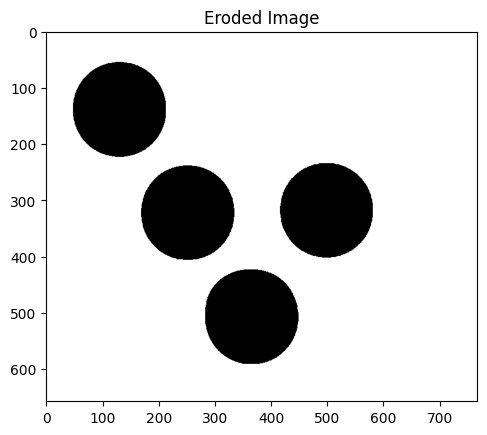

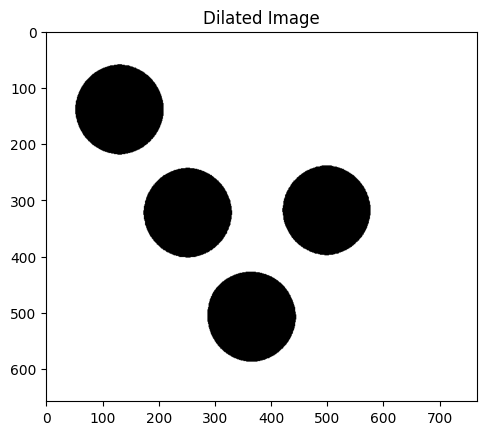

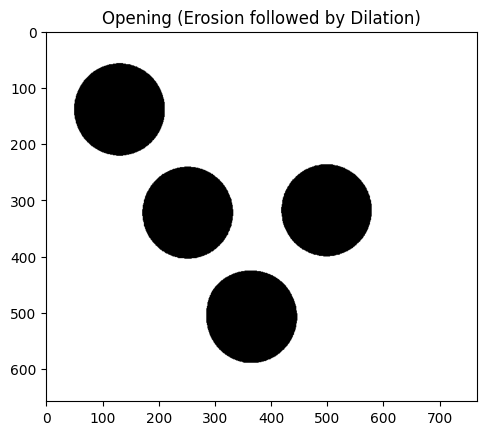

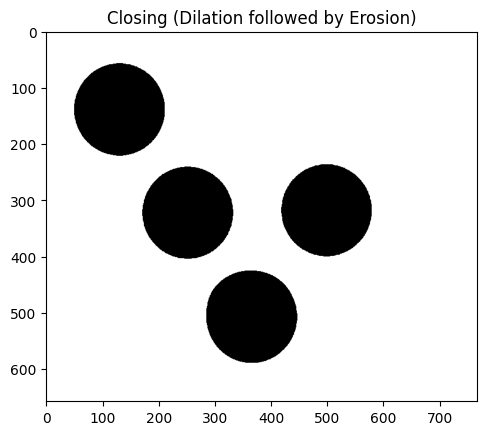

In [20]:
image = cv2.imread('/content/drive/MyDrive/TP2 VISION/circles.png', cv2.IMREAD_GRAYSCALE)
ret, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)

eroded_image = cv2.erode(binary_image, kernel, iterations=1)
dilated_image = cv2.dilate(binary_image, kernel, iterations=1)
opening_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closing_image = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.show()

plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.show()

plt.imshow(opening_image, cmap='gray')
plt.title('Opening (Erosion followed by Dilation)')
plt.show()

plt.imshow(closing_image, cmap='gray')
plt.title('Closing (Dilation followed by Erosion)')
plt.show()
